## Finding a model of neural variability which explains a variance to mean ratio greater than 1##
Across visual cortex cells have different levels of trial-to-trial variability as indexed by their variance to mean ratio (VMR). If cells were truly Poisson distributed than their mean would be equal to their variance. Yet in experiments we find VMR will often be much greater or less than 1. How can we explain this high variability in terms of a neural model?

## Correlation between inputs increases trial-to-trial variability but not enough ##

Differences in correlation of the inputs to a neuron could be on explanation for why VMR varies from cell to cell. Lets consider a model where the inputs to a neuron are correlated. The sum of their inputs will be more variable because of that correlation but by how much?

First we consider the population of input neurons modeled as Poisson random variables:

$$P_i(\lambda, \Sigma)$$
where
$$\Sigma = \begin{bmatrix}
    \lambda & \rho \lambda & \rho \lambda & \dots  & \rho \lambda \\
    \rho \lambda  & \lambda & \rho \lambda & \dots  & \rho \lambda \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \rho \lambda & \rho \lambda & \rho \lambda & \dots  & \lambda
\end{bmatrix} $$

Here we have the same drive ($\lambda$) and correlation ($\rho$) between all neurons. Now if all these neurons are innervating the neuron we are recording from $(Y)$ then we assume their inputs sum and are scaled by the number of neurons $n$.
$$Y = \frac{1}{n}\sum_i^n{P_i(\lambda)}$$ 

Whats the mean and variance then of our output neuron?

$$E[Y] = \lambda$$
$$Var(Y) = \frac{1}{n}^2 [n \lambda + (n^2 - n)\rho \lambda] = \frac{\lambda}{n} + \rho \lambda - \frac{\rho \lambda}{n} $$

with $n$ large 

$$Var(Y) \approx \rho \lambda$$

and the variance to mean ratio becomes $\frac{\rho \lambda}{\lambda}= \rho$

This is a  problem because $\rho \in [0,1]$ so this model would predict the neurons VMR is strictly less then one whereas many neurons have a VMR much higher than 1. Typical correlation values between adjacent neurons are between 0.1 and 0.3 (Kohn). And if the nervous system is doing averaging at each stage there should be almost no variability.

So where does the extra variability come from? 


## Multiplicative gain increases trial-to-trial variability but as a quadratic function of the mean not linear ##
One possible place the extra variability could come from per Goris et al. is multplicative scaling of neurons on slow time scales i.e. maybe the monkey was paying attention sometimes but not others and this can be modeled as multiplicative amplification of the firing rate. They propose a hierarchical model for which I will plug in our neuron:

$$Y_g = GY \ where \ Y \sim N(\lambda, \lambda \rho) \ and  \ G \sim Gamma(\alpha, \beta)$$

$$E[Gamma(\alpha, \beta)]  =  \alpha\beta$$
$$Var[Gamma(\alpha, \beta)]  =  \alpha\beta^2$$

We set gammas mean to be 1 so on average there is no modulation: 
$\alpha\beta = 1$ so $\alpha=\frac{1}{\beta}$
and variance is:
$\beta$

Now what's the expected value and variance of our neuron with the gain applied? We will use the iterated expectation and variance formula:
$$E[Y] = E[E[Y|X]]$$
$$Var(Y) = Var(E[Y|X]) + E[Var(Y|X)]$$
applying these to our gain model:
$$E[Y_g] = E[E[Y_g|G]] = E[G\lambda] = \lambda$$
$$Var(Y_g) = Var(E[GY|G]) + E[Var(GY|G)] = Var(G E[Y|G]) + E[G^2 Var(Y|G)] = Var(G\lambda) + E[G^2 \lambda\rho] = \lambda^2 Var(G) + \lambda \rho E[G^2]$$


$$Var(Y_g) = \lambda^2 \beta + \lambda \rho(\beta+1)$$
Because: $$E[G^2] = Var(G) + E[G]^2 = \beta + 1$$

thus there is the sum of a quadratic and linear relationship predicted between variance and the mean.  One thing to notice about the model is they already assume a Poisson spike neuron to start so do not explain how Poisson like variability is achieved in the first place. Also the $\lambda^2$ term was simply the result of the multiplicative gain, not anything special about the Gamma distribution.

Notice that the linear component is largely less than the quadratic component since if $\beta \lambda >(\beta +1)\rho$ the quadratic component contributes more. Yet it is very common to find neurons which are super-poisson but do not have a significant quadratic component in their VMR. So why do we get super-poisson neurons with a linear mean to variance relationship? One possible explanation is that the rectification of noisy membrane current amplifies variability.

## Rectifcation of rapidly varying membrane current produces Poisson like spiking (more like Binomial)##

Consider a neuron with many inputs whose membrane current is essentially Gaussian noise the result of the push and pull of many excitatory and inhbitory inputs. The mean of this guassian sits well beneath threshold but occasionally it crosses and an action potential is generated. Lets stimulate this idea below.

p=0.05


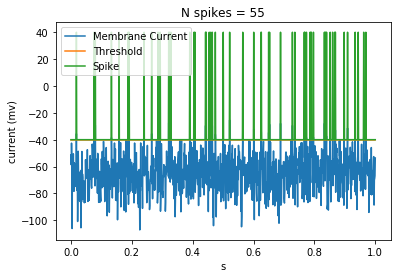

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
dur = 1 #duration of recording

fs = 1000#sampling rate in seconds
t = np.linspace(0, dur, dur*fs)
nbins = fs*dur #number of bins (number of refractory periods fit into the duration of the recording)
fr = 50. #desired firing rate
sd_cur = 15 # arbitrary variability of membrane current
p = fr/nbins #p is the chance in each bin of getting a spike
thresh = -40 # spiking threshold
#look up on the normal for what threshold will get that p
x = stats.norm.ppf(1-p, loc=0, scale=sd_cur)
#move the mean of the gaussian so that it is at that threshold
drive = thresh - x
print('p='+str(p))

#now generate the membrane current
c = np.random.randn(dur*fs)*sd_cur + drive
spike = c>-40

plt.plot(t, c)
plt.xlabel('s')
plt.ylabel('current (mv)')
plt.plot([0, dur],[-40,-40])
plt.plot(t, (spike)*80 - 40)
plt.legend(['Membrane Current', 'Threshold', 'Spike' ])
plt.title('N spikes = ' + str(sum(spike)));

The key insight is that when we bin the membrane current up into refractory periods and the spike count is the sum of whether threshold was crossed or not across bins we get a binomial distribution $B(n,p)$ where n is the number of refractory periods we are counting over, so in 1 second if refractory period is 1 ms we get n = 1000 bins, and p is just the probability that the normal distribution of the membrane current exceeds the threshold: $p = 1 - F_C(-40) = \int_{-40}^{\infty} f_C(c) \ dc$

And the VMR becomes $\frac{np(1-p)}{np} = 1-p$ which approaches 1 as $p$ becomes small and $p$ here is small. Typical firing rates are between 1 and 100 spks/s which correspond to, for a refractory period of 1 ms, respectively p of .01 and .1 respectively a VMR of .99 and .90.
So we've got at least our VMR slope of 1 back! Now what about super-poisson linear VMR?

## Correlated inputs and rectifcation give a more flexible linear VMR.##

Well lets relate this to our correlated inputs model. Lets suppose that the mean of the membrane current is a linear function of the average excitatory drive. But if the inputs are correlated this average excitatory drive will vary more from trial-to-trial. 

We will model the sum of inputs as a Gaussian with the mean and variance we worked out for our sum of poissons above but scaled by some constant s which squeezes things down so that we don't vary too far from threshold: $D = sY \sim N(s\lambda, s^2\rho \lambda)$. 

So our hierarchical model is:
$$Y \sim B(n, p) \  where \ p = 1-F_C(-40-D) $$

Thus our d is transformed by a smooth sigmoid function. Which is on a pretty local region of the sigmoid thus can be approximated well by linear transformation which we can lump into our $s$ term. So approximately:

$$Y \sim B(n=1000, p=D) \ where \ D \sim N(s\lambda, s^2\rho \lambda)$$

A reasonable value of s could be $\frac{1}{1000}$ so that assuming $\lambda \in [1,100]$ then D will roughly range between $\frac{1}{1000}$ and $\frac{1}{10}$ corresponding respectively to a firing rate between 1 and 100 spks/s. An obvious issue here is that $D \in (-\infty, +\infty)$ but for a binomial to be defined as distribution $p \in [0,1]$. So keep in mind this normal distribution should be truncated, but it won't be by much because the SD is quite tight. So when we calculated iterated variance later it is fine to assume it is the variance of a normal (?). So lets calculate the VMR.


$$E[Y] = E[E[Y|X]]$$
$$E[Y] = E[E[Y|D]] = E[nD] = ns \lambda = \lambda$$

$$Var(Y) = Var(E[Y|D]) + E[Var(Y|D)]$$
$$Var(Y) = Var(nD) + E[nD(1-D)] = n^2 s^2 \rho \lambda  + n s \lambda-nE[D^2] $$
$$= \rho \lambda  + \lambda-nE[D^2] $$
$$ \rho \lambda  + \lambda - ns^2\rho\lambda - ns^2\lambda^2$$

$$ \rho \lambda  + \lambda - s\rho\lambda - s\lambda^2$$

where the last two terms are largely neglible so

$$Var(Y) \approx \lambda + \rho \lambda$$
$$E[Y]  = \lambda$$





Keep in mind variability could be higher with smaller pools of neurons (i.e. we ignored some variability by saying n was large), conversely variability could be lower if firing rate is very high (i.e. we ignored the negative terms in the variance just now because we assumed s was small but with very high firing rates it would become less negligible).

Whats the intuition here? The expected value is not surprising, the thing to focus on is the variance. Imagine the joint distribution for a given $\lambda$ with the normal slices parralel to the x axis and binomial slices on the Y. Clearly there is a positve correlation between the two distributions as when D goes up Y will go up.

Let

$$Y \sim P[\lambda]$$
and 
$$\lambda \sim N[d, \sigma^2]$$

$$E[Y] = E[E[Y|X]]$$
$$E[Y] = E[E[Y|\lambda]] = E[\lambda] = d$$

$$Var(Y) = Var(E[Y|\lambda]) + E[Var(Y|\lambda)]$$
$$Var(Y) =  Var(\lambda) + E(\lambda) = d +  \sigma^2$$

Basically the intuion here is if the random variable Y has a mean which dependeds on the variance, then it will pop out for both the expectation and variance in the first round of iteration